In [17]:
# 1. Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [9]:
y = pd.Series(data.target)


In [11]:
print("Sample of original features:")
print(X.head())

print("\nSample of target labels:")
print(y.head())

Sample of original features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Sample of target labels:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [12]:
# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("\nSample of training features before scaling:")
print(X_train.head())


Sample of training features before scaling:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


In [14]:
# 4. Preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
print("\nSample of training features after scaling:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())


Sample of training features after scaling:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.473937          1.203658          -1.562535         -1.312603
1          -0.133071          2.992376          -1.276006         -1.045633
2           1.085898          0.085709           0.385858          0.289218
3          -1.230143          0.756479          -1.218701         -1.312603
4          -1.717731          0.309299          -1.390618         -1.312603


In [18]:
# 5. Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [19]:
# 6. Evaluation loop
results = []  # list of dicts to hold results for each model
conf_matrices = {}  # store confusion matrices

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics (macro-averaged for multiclass)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })
    
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print('-'*40)


Random Forest Evaluation:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

----------------------------------------

Logistic Regression Evaluation:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

----------------------------------------

Support Vector Machine Evaluation:
              precision    recall  f1-score   support

     

In [20]:

# 7. Show summary table of all model scores
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df.sort_values(by='F1 Score', ascending=False))


Summary of Model Performance:
                    Model  Accuracy  Precision  Recall  F1 Score
0           Random Forest       1.0        1.0     1.0       1.0
1     Logistic Regression       1.0        1.0     1.0       1.0
2  Support Vector Machine       1.0        1.0     1.0       1.0
3     K-Nearest Neighbors       1.0        1.0     1.0       1.0
4             Naive Bayes       1.0        1.0     1.0       1.0
5       Gradient Boosting       1.0        1.0     1.0       1.0


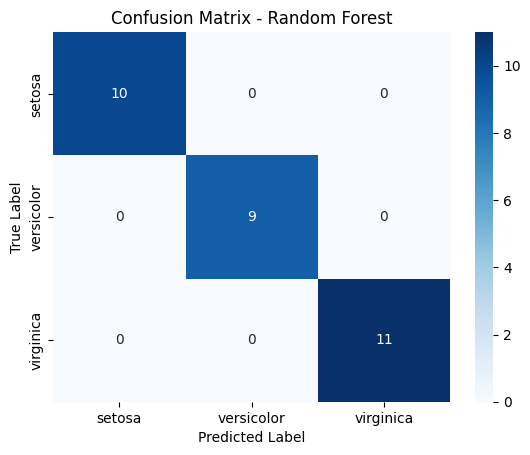

In [21]:
# 8. Plot confusion matrix of best model
best_model_name = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Model']
best_cm = conf_matrices[best_model_name]

sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()